# Analysez les ventes d'une librairie avec R ou Python

## Importation et nettoyage des donnees

In [1]:
import pandas as pd
import numpy as np
customers=pd.read_csv('C:/Users/lenovo/OneDrive/Desktop/DAN-P6-donnees/customers.csv')
products=pd.read_csv('C:/Users/lenovo/OneDrive/Desktop/DAN-P6-donnees/products.csv')
transactions=pd.read_csv('C:/Users/lenovo/OneDrive/Desktop/DAN-P6-donnees/transactions.csv')

In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [3]:
 products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [5]:
customers.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [6]:
 products.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [7]:
transactions.head()

id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

### verification des doublons

In [8]:
transactions[transactions.duplicated(subset=['id_prod','session_id','client_id'])]


id_prod                             date session_id client_id
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
6094     1_358       2023-01-22 15:21:38.094427   s_330675    c_5896
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
18657    1_397       2022-05-17 05:59:48.299113   s_209799     c_915
...        ...                              ...        ...       ...
677618  0_1561       2021-06-21 05:30:53.999603    s_51611    c_8596
678160  0_2267       2021-04-01 04:30:02.545268    s_14298    c_7526
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1
679356   1_459       2021-12-14 10:10:02.741338   s_134184     c_120
679436   1_456       2022-03-24 06:42:14.381510   s_183690    c_4222

[1025 rows x 4 columns]

In [9]:
transactions.duplicated(subset=['id_prod','session_id','client_id']).sum()


1025

In [10]:
transactions.sort_values('session_id')

id_prod                             date session_id client_id
320833     T_0  test_2021-03-01 02:30:02.237447        s_0      ct_1
561543     T_0  test_2021-03-01 02:30:02.237436        s_0      ct_1
634523     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_0
295782     T_0  test_2021-03-01 02:30:02.237418        s_0      ct_1
237649     T_0  test_2021-03-01 02:30:02.237414        s_0      ct_1
...        ...                              ...        ...       ...
508968  0_1362       2021-10-04 18:58:49.228317    s_99996    c_4900
504526  0_1197       2021-10-04 18:45:38.003516    s_99997    c_3521
633558  0_1572       2021-10-04 18:45:54.374885    s_99998    c_2795
48865   0_1411       2021-10-04 18:50:59.099942    s_99998    c_2795
599185  0_1604       2021-10-04 19:00:20.030388    s_99998    c_2795

[679532 rows x 4 columns]

In [11]:
transactions.drop(transactions[transactions['id_prod']=='T_0'].index,inplace=True)
transactions[transactions.duplicated(subset=['id_prod','session_id','client_id'])]

id_prod                        date session_id client_id
6094     1_358  2023-01-22 15:21:38.094427   s_330675    c_5896
18657    1_397  2022-05-17 05:59:48.299113   s_209799     c_915
22740   0_1335  2023-02-01 19:20:44.400847   s_335537    c_4561
33919    2_135  2022-03-21 06:40:55.552140   s_182189    c_5160
52186   0_1471  2021-03-24 06:38:07.416329    s_10704    c_1320
...        ...                         ...        ...       ...
677516   1_493  2021-12-05 06:48:02.595121   s_129620    c_7442
677618  0_1561  2021-06-21 05:30:53.999603    s_51611    c_8596
678160  0_2267  2021-04-01 04:30:02.545268    s_14298    c_7526
679356   1_459  2021-12-14 10:10:02.741338   s_134184     c_120
679436   1_456  2022-03-24 06:42:14.381510   s_183690    c_4222

[827 rows x 4 columns]

In [12]:
transactions.duplicated(subset=['id_prod','session_id','client_id']).sum()


827

In [13]:
transactions.duplicated(subset=['id_prod','session_id','client_id']).sum()
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

In [14]:
transactions.duplicated(subset=['id_prod','session_id','client_id']).sum()


827

In [15]:
 products.duplicated(subset=['id_prod','price']).sum()

0

In [16]:
 customers.duplicated(subset=['client_id','sex','birth']).sum()

0

### Questions d'Annabelle

In [17]:
trans_prod=pd.merge(transactions,products,how='left', on='id_prod')
trans_prod.head()

id_prod                        date session_id client_id  price  categ
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   4.18    0.0
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534  15.99    1.0
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714   7.99    0.0
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941  69.99    2.0
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232   4.99    0.0

In [18]:
trans_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  float64
dtypes: float64(2), object(4)
memory usage: 36.3+ MB


In [19]:
trans_prod[trans_prod.price.isna()].sort_values('id_prod')

id_prod                        date session_id client_id  price  categ
2633    0_2245  2022-09-23 07:22:38.636773   s_272266    c_4746    NaN    NaN
462607  0_2245  2022-09-25 19:58:42.716401   s_273466    c_7102    NaN    NaN
466619  0_2245  2022-10-01 00:09:29.301897   s_275945     c_580    NaN    NaN
466880  0_2245  2022-07-15 06:19:44.035000   s_238618    c_4765    NaN    NaN
471449  0_2245  2022-05-05 17:04:43.982913   s_204093    c_6714    NaN    NaN
...        ...                         ...        ...       ...    ...    ...
286014  0_2245  2022-10-19 03:08:45.918021   s_284618    c_4935    NaN    NaN
287547  0_2245  2022-01-04 19:02:47.712837   s_144966    c_8595    NaN    NaN
291710  0_2245  2022-11-14 23:34:15.559623   s_297665    c_5157    NaN    NaN
252855  0_2245  2022-08-04 19:02:47.712837   s_248379    c_8595    NaN    NaN
677797  0_2245  2021-12-14 22:34:54.589921   s_134446    c_4854    NaN    NaN

[221 rows x 6 columns]

In [20]:
trans_prod[trans_prod.price.isna()]

id_prod                        date session_id client_id  price  categ
2633    0_2245  2022-09-23 07:22:38.636773   s_272266    c_4746    NaN    NaN
10103   0_2245  2022-07-23 09:24:14.133889   s_242482    c_6713    NaN    NaN
11723   0_2245  2022-12-03 03:26:35.696673   s_306338    c_5108    NaN    NaN
15670   0_2245  2021-08-16 11:33:25.481411    s_76493    c_1391    NaN    NaN
16372   0_2245  2022-07-16 05:53:01.627491   s_239078    c_7954    NaN    NaN
...        ...                         ...        ...       ...    ...    ...
669533  0_2245  2021-08-25 09:06:03.504061    s_80395     c_131    NaN    NaN
670484  0_2245  2022-03-06 19:59:19.462288   s_175311    c_4167    NaN    NaN
671088  0_2245  2022-05-16 11:35:20.319501   s_209381    c_4453    NaN    NaN
675480  0_2245  2022-02-11 09:05:43.952857   s_163405    c_1098    NaN    NaN
677797  0_2245  2021-12-14 22:34:54.589921   s_134446    c_4854    NaN    NaN

[221 rows x 6 columns]

In [21]:
trans_prod['price'].isnull().sum()

221

In [22]:
trans_prod.drop(trans_prod[trans_prod['price'].isna()].index,inplace=True)
trans_prod['price'].isnull().sum()

0

In [23]:
trans_prod['price'].isnull().sum()

0

In [24]:
trans_prod[trans_prod.price.isna()]

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ]
Index: []

In [25]:
trans_prod.info()
trans_prod.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  float64
dtypes: float64(2), object(4)
memory usage: 36.3+ MB


id_prod                        date session_id client_id  price  categ
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   4.18    0.0
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534  15.99    1.0
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714   7.99    0.0
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941  69.99    2.0
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232   4.99    0.0

In [26]:
# modification format date

In [27]:
trans_prod['date']=trans_prod['date'].apply(lambda x:str(x[:10]))
trans_prod['date']

0         2022-05-20
1         2022-02-02
2         2022-06-18
3         2021-06-24
4         2023-01-11
             ...    
679327    2022-01-15
679328    2022-03-19
679329    2022-12-20
679330    2021-07-16
679331    2022-09-28
Name: date, Length: 679111, dtype: object

In [28]:
trans_prod['date'] = pd.to_datetime(trans_prod['date'])
trans_prod.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 36.3+ MB


In [29]:
trans_prod['month'] = trans_prod['date'].dt.strftime('%Y-%m')
trans_prod.head()

id_prod       date session_id client_id  price  categ    month
0  0_1518 2022-05-20   s_211425     c_103   4.18    0.0  2022-05
1   1_251 2022-02-02   s_158752    c_8534  15.99    1.0  2022-02
2  0_1277 2022-06-18   s_225667    c_6714   7.99    0.0  2022-06
3   2_209 2021-06-24    s_52962    c_6941  69.99    2.0  2021-06
4  0_1509 2023-01-11   s_325227    c_4232   4.99    0.0  2023-01

In [30]:
trans_prod_customers=pd.merge(trans_prod,customers,how='left', on='client_id')
trans_prod_customers.head()

id_prod       date session_id client_id  price  categ    month sex  birth
0  0_1518 2022-05-20   s_211425     c_103   4.18    0.0  2022-05   f   1986
1   1_251 2022-02-02   s_158752    c_8534  15.99    1.0  2022-02   m   1988
2  0_1277 2022-06-18   s_225667    c_6714   7.99    0.0  2022-06   f   1968
3   2_209 2021-06-24    s_52962    c_6941  69.99    2.0  2021-06   m   2000
4  0_1509 2023-01-11   s_325227    c_4232   4.99    0.0  2023-01   m   1980

In [31]:
trans_prod_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   month       679111 non-null  object        
 7   sex         679111 non-null  object        
 8   birth       679111 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 51.8+ MB


In [32]:
trans_prod_customers['age'] = trans_prod_customers['birth'].apply(lambda x:2022-x)
trans_prod_customers.head()

id_prod       date session_id client_id  price  categ    month sex  birth  \
0  0_1518 2022-05-20   s_211425     c_103   4.18    0.0  2022-05   f   1986   
1   1_251 2022-02-02   s_158752    c_8534  15.99    1.0  2022-02   m   1988   
2  0_1277 2022-06-18   s_225667    c_6714   7.99    0.0  2022-06   f   1968   
3   2_209 2021-06-24    s_52962    c_6941  69.99    2.0  2021-06   m   2000   
4  0_1509 2023-01-11   s_325227    c_4232   4.99    0.0  2023-01   m   1980   

   age  
0   36  
1   34  
2   54  
3   22  
4   42

## les différents indicateurs et graphiques autour du chiffre d'affaires

In [33]:
df_ca_sex=trans_prod_customers.groupby('sex').agg(ca=('price', np.sum))
df_ca_sex.head()

ca
sex            
f    5859683.13
m    5994045.55

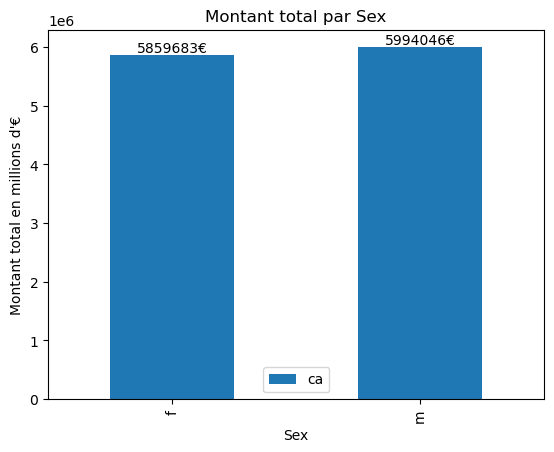

In [102]:
import matplotlib.pyplot as plt
ax = df_ca_sex.plot(kind='bar')

ax.bar_label(ax.containers[0], labels=[f"{val:.0f}€" for val in df_ca_sex.values.flatten()])

plt.xlabel("Sex")
plt.ylabel("Montant total en millions d'€")
plt.title("Montant total par Sex")

plt.show()

In [35]:
df_ca_categ=trans_prod_customers.groupby('categ').agg(ca=('price', np.sum))
df_ca_categ.head()

ca
categ            
0.0    4419730.97
1.0    4653722.69
2.0    2780275.02

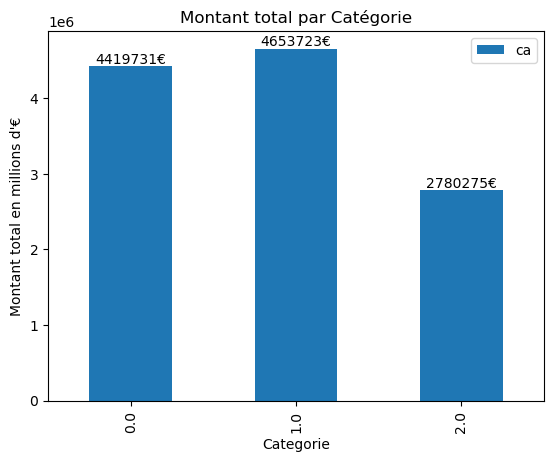

In [36]:
import matplotlib.pyplot as plt
ax = df_ca_categ.plot(kind='bar')

ax.bar_label(ax.containers[0], labels=[f"{val:.0f}€" for val in df_ca_categ.values.flatten()])

plt.xlabel("Categorie")
plt.ylabel("Montant total en millions d'€")
plt.title("Montant total par Catégorie")

plt.show()

In [37]:
df_ca_month=trans_prod_customers[trans_prod_customers.categ==0.0].groupby('month').agg(ca_0=('price', np.sum))
df_ca_month['ca_1']=trans_prod_customers[trans_prod_customers.categ==1.0].groupby('month').agg(ca_1=('price', np.sum)).ca_1
df_ca_month['ca_2']=trans_prod_customers[trans_prod_customers.categ==2.0].groupby('month').agg(ca_2=('price', np.sum)).ca_2
df_ca_month.head()

ca_0       ca_1       ca_2
month                                   
2021-03  193629.17  186974.17  101837.27
2021-04  205222.46  156138.35  114748.49
2021-05  196186.72  165893.40  130863.35
2021-06  167943.15  189162.04  126983.37
2021-07  144750.79  188523.27  149561.34

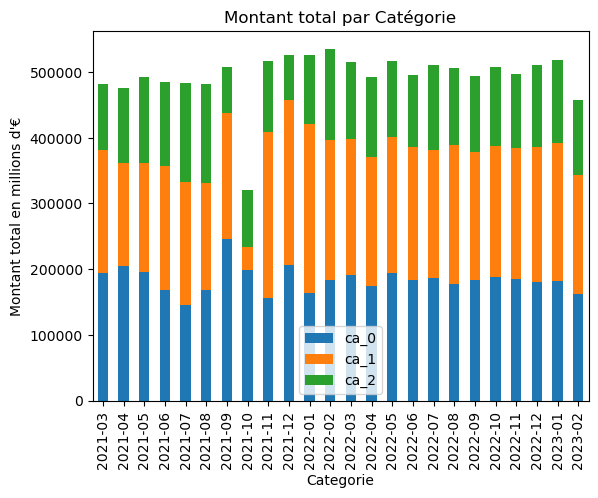

In [38]:
import matplotlib.pyplot as plt
ax = df_ca_month.plot(kind='bar',stacked=True)


plt.xlabel("Categorie")
plt.ylabel("Montant total en millions d'€")
plt.title("Montant total par Catégorie")

plt.show()

In [39]:
df_ca_day=trans_prod_customers[(trans_prod_customers.categ==0.0)&(trans_prod_customers.month=='2021-10')].groupby('date').agg(ca_0=('price', np.sum))
df_ca_day['ca_1']=trans_prod_customers[(trans_prod_customers.categ==1.0)&(trans_prod_customers.month=='2021-10')].groupby('date').agg(ca_1=('price', np.sum)).ca_1
df_ca_day['ca_2']=trans_prod_customers[(trans_prod_customers.categ==2.0)&(trans_prod_customers.month=='2021-10')].groupby('date').agg(ca_2=('price', np.sum)).ca_2
df_ca_day.head()

ca_0     ca_1     ca_2
date                                 
2021-10-01  6950.50  7003.79  3104.05
2021-10-02  7141.01      NaN  2041.12
2021-10-03  6786.57      NaN  2206.48
2021-10-04  6533.60      NaN  2746.08
2021-10-05  6357.91      NaN  3032.55

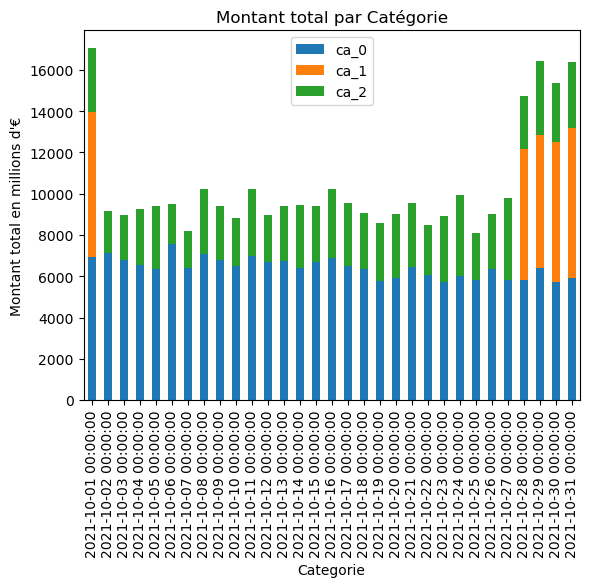

In [40]:
import matplotlib.pyplot as plt
ax = df_ca_day.plot(kind='bar',stacked=True)


plt.xlabel("Categorie")
plt.ylabel("Montant total en millions d'€")
plt.title("Montant total par Catégorie")

plt.show()

### L’évolution dans le temps et mise en place une décomposition en moyenne mobile pour évaluer la tendance globale 

In [41]:
df_ca_month=trans_prod_customers.groupby('month').agg(ca=('price', np.sum))
df_ca_month['ca_ma_3']=df_ca_month.ca.rolling(3).mean()
df_ca_month['ca_ma_5']=df_ca_month.ca.rolling(5).mean()

df_ca_month.head()

ca        ca_ma_3     ca_ma_5
month                                        
2021-03  482440.61            NaN         NaN
2021-04  476109.30            NaN         NaN
2021-05  492943.47  483831.126667         NaN
2021-06  484088.56  484380.443333         NaN
2021-07  482835.40  486622.476667  483683.468

<AxesSubplot:xlabel='month'>

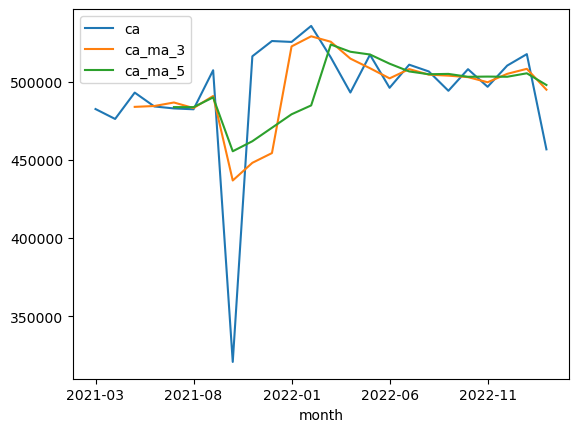

In [42]:
df_ca_month.plot.line()

In [43]:
# suppression octobre 

In [44]:
trans_prod_customers.head()

id_prod       date session_id client_id  price  categ    month sex  birth  \
0  0_1518 2022-05-20   s_211425     c_103   4.18    0.0  2022-05   f   1986   
1   1_251 2022-02-02   s_158752    c_8534  15.99    1.0  2022-02   m   1988   
2  0_1277 2022-06-18   s_225667    c_6714   7.99    0.0  2022-06   f   1968   
3   2_209 2021-06-24    s_52962    c_6941  69.99    2.0  2021-06   m   2000   
4  0_1509 2023-01-11   s_325227    c_4232   4.99    0.0  2023-01   m   1980   

   age  
0   36  
1   34  
2   54  
3   22  
4   42

In [45]:
trans_prod_customers.drop(trans_prod_customers[trans_prod_customers.month=='2022-10'].index,inplace=True)
trans_prod_customers[trans_prod_customers.month=='2022-10']

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ, month, sex, birth, age]
Index: []

## top/flop produits

In [46]:
df_ca_prod=trans_prod_customers.groupby('id_prod').agg(ca=('price', np.sum))
df_ca_prod.sort_values(by=['ca'],ascending=False,inplace=True)
df_ca_prod.head(10)

ca
id_prod          
2_159    90951.77
2_135    66575.35
2_112    62637.39
2_102    58134.62
2_209    53682.33
1_369    51914.36
2_110    51667.50
1_395    51631.19
2_39     50509.29
1_383    49717.85

In [47]:
df_ca_prod.tail(10)

ca
id_prod      
0_898    2.54
0_1498   2.48
0_1576   2.29
0_1728   2.27
0_1601   1.99
0_807    1.99
0_541    1.99
0_1653   1.98
0_1284   1.38
0_1539   0.99

## repartition du ca par categorie de produits

In [48]:
df_ca_prod['ca_0']=trans_prod_customers[trans_prod_customers.categ==0.0].groupby('id_prod').agg(ca_0=('price', np.sum)).ca_0
df_ca_prod['ca_1']=trans_prod_customers[trans_prod_customers.categ==1.0].groupby('id_prod').agg(ca_1=('price', np.sum)).ca_1
df_ca_prod['ca_2']=trans_prod_customers[trans_prod_customers.categ==2.0].groupby('id_prod').agg(ca_2=('price', np.sum)).ca_2
df_ca_prod.head(100)

ca  ca_0      ca_1      ca_2
id_prod                                    
2_159    90951.77   NaN       NaN  90951.77
2_135    66575.35   NaN       NaN  66575.35
2_112    62637.39   NaN       NaN  62637.39
2_102    58134.62   NaN       NaN  58134.62
2_209    53682.33   NaN       NaN  53682.33
...           ...   ...       ...       ...
2_230    22131.52   NaN       NaN  22131.52
2_172    21827.46   NaN       NaN  21827.46
2_185    21819.04   NaN       NaN  21819.04
1_433    21686.58   NaN  21686.58       NaN
1_325    21664.26   NaN  21664.26       NaN

[100 rows x 4 columns]

In [49]:
trans_prod_customers_gr_id=trans_prod_customers.groupby('id_prod')
trans_prod_customers_gr_id.head()

id_prod       date session_id client_id  price  categ    month sex  \
0       0_1518 2022-05-20   s_211425     c_103   4.18    0.0  2022-05   f   
1        1_251 2022-02-02   s_158752    c_8534  15.99    1.0  2022-02   m   
2       0_1277 2022-06-18   s_225667    c_6714   7.99    0.0  2022-06   f   
3        2_209 2021-06-24    s_52962    c_6941  69.99    2.0  2021-06   m   
4       0_1509 2023-01-11   s_325227    c_4232   4.99    0.0  2023-01   m   
...        ...        ...        ...       ...    ...    ...      ...  ..   
674673  0_1776 2023-02-26   s_347374    c_4397  21.16    0.0  2023-02   m   
678194   1_382 2022-11-23   s_301565    c_4770  61.52    1.0  2022-11   m   
678256    0_85 2021-04-07    s_17054    c_4486   2.99    0.0  2021-04   m   
678344   1_470 2021-04-28    s_27032     c_519   5.41    1.0  2021-04   f   
678787  0_2237 2021-09-11    s_88012    c_5772   2.99    0.0  2021-09   m   

        birth  age  
0        1986   36  
1        1988   34  
2        1968   54  
3        2000   22  
4        1980   42  
...       ...  ...  
674673   1956   66  
678194   1970   52  
678256   1981   41  
678344   1954   68  
678787   1975   47  

[15978 rows x 10 columns]

In [50]:
df_ca_customers=trans_prod_customers.groupby('client_id').agg(
    sex=('sex', np.max),
    age=('age', np.max),
    ca=('price', np.sum),
    count=('session_id', np.count_nonzero),
    mean=('price',np.mean))


In [51]:
df_ca_customers

sex  age       ca  count       mean
client_id                                    
c_1         m   67   535.20     37  14.464865
c_10        m   66  1213.97     54  22.480926
c_100       m   30   254.85      8  31.856250
c_1000      f   56  2189.68    121  18.096529
c_1001      m   40  1812.86    102  17.773137
...        ..  ...      ...    ...        ...
c_995       m   67   174.42     13  13.416923
c_996       f   52  1567.70     91  17.227473
c_997       f   28  1447.50     58  24.956897
c_998       m   21  2666.90     51  52.292157
c_999       m   58   692.83     45  15.396222

[8600 rows x 5 columns]

In [52]:
df_ca_customers.head()

sex  age       ca  count       mean
client_id                                    
c_1         m   67   535.20     37  14.464865
c_10        m   66  1213.97     54  22.480926
c_100       m   30   254.85      8  31.856250
c_1000      f   56  2189.68    121  18.096529
c_1001      m   40  1812.86    102  17.773137

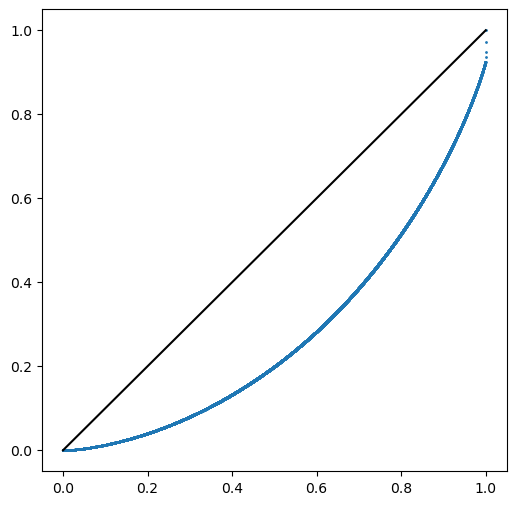

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

X=df_ca_customers.ca.sort_values()
X_lorenz = X.cumsum() / X.sum()

fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,s=1)
## line plot of equality
ax.plot([0,1], [0,1],color='k')
plt.show()

In [54]:
import numpy as np

#define function to calculate Gini coefficient
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

gini(X)

0.4460962590142196

In [55]:
## le coeff de gini est de 0,44 il est plus proche de 0 que de 1 (0 signifie l'égalité parfaite )

In [56]:
df_ca_customers.sort_values('ca',ascending=False,inplace=True)
df_ca_customers.head(10)

sex  age         ca  count       mean
client_id                                      
c_1609      m   42  310897.29  24449  12.716156
c_4958      m   23  277167.93   4968  55.790646
c_6714      f   54  147086.21   8789  16.735261
c_3454      m   53  108776.83   6478  16.791730
c_1570      f   43    5146.94    358  14.376927
c_2140      f   45    5002.21    387  12.925607
c_3263      f   37    5001.50    384  13.024740
c_2899      f   28    4902.96    102  48.068235
c_7421      m   44    4902.49    370  13.249973
c_8392      f   44    4835.99    360  13.433306

In [57]:
df_ca_customers.iloc[:4,:].ca.sum()/df_ca_customers.ca.sum()*1e2

7.438236602869666

In [58]:
#### les 4 plus grand clients represente 7,4% du CA 

In [59]:
df_ca_prod.head()

ca  ca_0  ca_1      ca_2
id_prod                                
2_159    90951.77   NaN   NaN  90951.77
2_135    66575.35   NaN   NaN  66575.35
2_112    62637.39   NaN   NaN  62637.39
2_102    58134.62   NaN   NaN  58134.62
2_209    53682.33   NaN   NaN  53682.33

In [60]:
trans_prod_customers_gr_id.head()

id_prod       date session_id client_id  price  categ    month sex  \
0       0_1518 2022-05-20   s_211425     c_103   4.18    0.0  2022-05   f   
1        1_251 2022-02-02   s_158752    c_8534  15.99    1.0  2022-02   m   
2       0_1277 2022-06-18   s_225667    c_6714   7.99    0.0  2022-06   f   
3        2_209 2021-06-24    s_52962    c_6941  69.99    2.0  2021-06   m   
4       0_1509 2023-01-11   s_325227    c_4232   4.99    0.0  2023-01   m   
...        ...        ...        ...       ...    ...    ...      ...  ..   
674673  0_1776 2023-02-26   s_347374    c_4397  21.16    0.0  2023-02   m   
678194   1_382 2022-11-23   s_301565    c_4770  61.52    1.0  2022-11   m   
678256    0_85 2021-04-07    s_17054    c_4486   2.99    0.0  2021-04   m   
678344   1_470 2021-04-28    s_27032     c_519   5.41    1.0  2021-04   f   
678787  0_2237 2021-09-11    s_88012    c_5772   2.99    0.0  2021-09   m   

        birth  age  
0        1986   36  
1        1988   34  
2        1968   54  
3        2000   22  
4        1980   42  
...       ...  ...  
674673   1956   66  
678194   1970   52  
678256   1981   41  
678344   1954   68  
678787   1975   47  

[15978 rows x 10 columns]

In [61]:
df_ca_prod_prix=trans_prod_customers[trans_prod_customers.categ==0.0].groupby('id_prod').agg(ca_0=('price', np.mean))
df_ca_prod_prix['ca_1']=trans_prod_customers[trans_prod_customers.categ==1.0].groupby('id_prod').agg(ca_1=('price', np.mean)).ca_1
df_ca_prod_prix['ca_2']=trans_prod_customers[trans_prod_customers.categ==2.0].groupby('id_prod').agg(ca_2=('price', np.mean)).ca_2
df_ca_prod_prix.head(20)

ca_0  ca_1  ca_2
id_prod                   
0_0       3.75   NaN   NaN
0_1      10.99   NaN   NaN
0_10     17.95   NaN   NaN
0_100    20.60   NaN   NaN
0_1000    6.84   NaN   NaN
0_1001    4.99   NaN   NaN
0_1002    8.31   NaN   NaN
0_1003   14.99   NaN   NaN
0_1004    8.07   NaN   NaN
0_1005   20.99   NaN   NaN
0_1006   26.64   NaN   NaN
0_1007    4.99   NaN   NaN
0_1008    4.73   NaN   NaN
0_1009   14.99   NaN   NaN
0_101    12.99   NaN   NaN
0_1010    1.96   NaN   NaN
0_1011   13.99   NaN   NaN
0_1012   32.40   NaN   NaN
0_1013    4.99   NaN   NaN
0_1015   10.99   NaN   NaN

In [62]:
df_ca_prod_prix.tail()

ca_0  ca_1  ca_2
id_prod                   
0_995    10.99   NaN   NaN
0_996    11.64   NaN   NaN
0_997     9.99   NaN   NaN
0_998     9.41   NaN   NaN
0_999     9.99   NaN   NaN

In [63]:
df_ca_prod_prix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2292 entries, 0_0 to 0_999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ca_0    2292 non-null   float64
 1   ca_1    0 non-null      float64
 2   ca_2    0 non-null      float64
dtypes: float64(3)
memory usage: 71.6+ KB


<AxesSubplot:xlabel='categ', ylabel='price'>

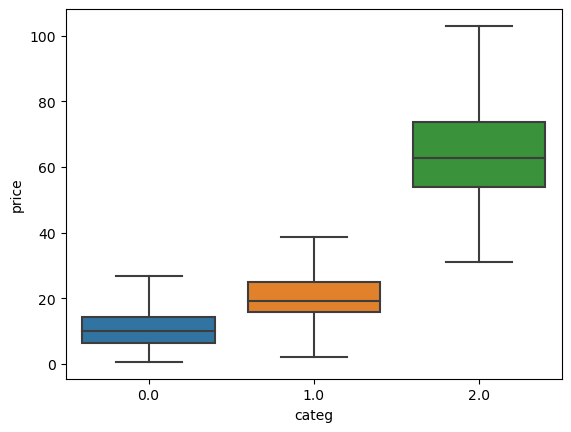

In [64]:


import seaborn as sns

sns.boxplot(x='categ', y='price', data=trans_prod_customers,showfliers=False)

In [65]:
df_ca_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 2_159 to 0_1539
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ca      3265 non-null   float64
 1   ca_0    2292 non-null   float64
 2   ca_1    737 non-null    float64
 3   ca_2    236 non-null    float64
dtypes: float64(4)
memory usage: 127.5+ KB


## Analyse bivariee 

### etude de la relation de correlation entre le genre et la categorie de livre achete 
est-ce que le genre influence la categ de livre achete?

### crosstab avec .crosstab et constat graphique

In [66]:
crosstab=pd.crosstab(trans_prod_customers.categ,
                     trans_prod_customers.sex,margins=True)
crosstab.head()

sex         f       m     All
categ                        
0.0    197331  200464  397795
1.0    109899  107544  217443
2.0     16524   18385   34909
All    323754  326393  650147

<AxesSubplot:xlabel='categ'>

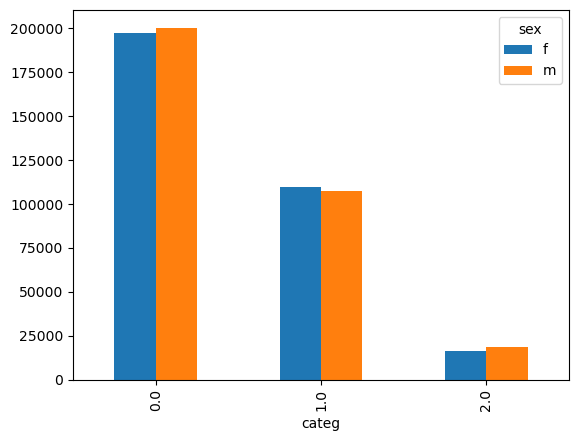

In [67]:
crosstab.iloc[:3,:2].plot.bar()

## test central khi-deux

H0: les deux variable sont independantes
    
H1: les deux variable sont dependantes 

si la pvalue est inferieur a 0,05 (le risque 5%) on rejete h0 autrement dit les variable sont dependantes

si la p value est sup a 5% on mantient h0, les variables sont independantes

In [68]:
import scipy.stats as stats
chi, pvalue, df, expected=stats.chi2_contingency(crosstab.iloc[:3,:2])
pvalue

7.686915684164627e-31

la pvalue est inferieur a 0,05 (le risque 5%) on rejete h0 autrement dit les variable sont dependantes

###### on va mesurer la force de la relation avec la stat cramers'V

In [69]:
n=crosstab.iloc[3,2]
k=min(crosstab.iloc[:3,:2].shape)

V=np.sqrt(chi/(n*(k-1)))
V

0.014605050776440755

###### la relation est negligeable 0.014 est inferieur a 0,1 (voir tableau cramer)

### comparaison des moyennes
est-ce que l'age des clients influence la categ des livres achete?

### constat graphique

In [70]:
df_cat_age=trans_prod_customers[trans_prod_customers.categ==0.0].groupby('age').agg(nb_0=('price', np.count_nonzero))
df_cat_age['nb_1']=trans_prod_customers[trans_prod_customers.categ==1.0].groupby('age').agg(nb_1=('price', np.count_nonzero))
df_cat_age['nb_2']=trans_prod_customers[trans_prod_customers.categ==2.0].groupby('age').agg(nb_2=('price', np.count_nonzero))
df_cat_age.head(5)

nb_0  nb_1  nb_2
age                  
18   3259  5476  5774
19    879  1622  1702
20    984  1656  1774
21    931  1487  1640
22   1072  1574  1600

<AxesSubplot:xlabel='categ', ylabel='age'>

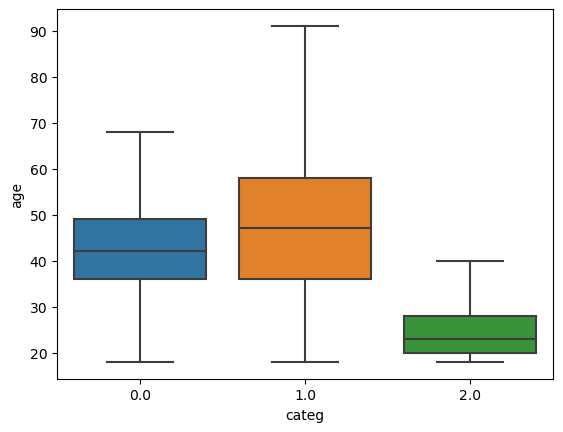

In [71]:
import seaborn as sns

sns.boxplot(x='categ', y='age', data=trans_prod_customers,showfliers=False)


In [72]:
### pre-requis de normalite 

### faire un test de shapiro st.shapiro sur les 3 sous-groupes

le test de shapiro

H0: l'echantillon suit une loi normale

H1: l'echantillon ne suit pas une loi normale

si la pvalue est inf a 0.05 on rejete h0 autrement dit l'echantillon ne suit pas une loi normale

si la pvalue est sup a 0.05 on maintient h0 autrement dit l'echantillon suit une loi normale


In [73]:
stats.shapiro(df_cat_age.nb_0)

ShapiroResult(statistic=0.7276884317398071, pvalue=1.4372182610689066e-10)

In [74]:
stats.shapiro(df_cat_age.nb_1)

ShapiroResult(statistic=0.9321385622024536, pvalue=0.000538312888238579)

In [75]:
stats.shapiro(df_cat_age.nb_2)

ShapiroResult(statistic=0.4763035178184509, pvalue=5.203781216291158e-15)

#### la pvalue est inf a 0.05 on rejete h0 autrment dit l echantillon ne suit pas une loi normale


### Pre-requis d'egalite des variances, test de levene

H0: les variances de tous les sous groupes sont egales

h1: il y a au moins l'un des sous groupe avec une variance differente
    
si la pvalue est inf a 0.05 on rejete h0 autrment dit les variances ne sont pas toutes egales

si la pvalue est sup a 0.05 on maintient h0 autrment dit les variances sont toutes egales

In [76]:
stats.levene(df_cat_age.nb_0,df_cat_age.nb_1,df_cat_age.nb_2)

LeveneResult(statistic=24.645101603663207, pvalue=2.098335659730871e-10)

#### la pvalue est inf a 0.05 on rejete h0 autrment dit les variances ne sont pas toutes egales


### les pre-requis n'etant pas satisfait on ne peut pas passer le test parametrique anova (base sur la moyenne), on passe un test non-para (base sur la medianne) kruskal_wallis

h0: les mediannes de tous les sous groupes sont egales

h1: les mediannes ne sont pas toutes egales

si la pvalue est inf a 0.05 on rejete h0 autrement dit les mediannes ne sont pas toutes egales

si la pvalue est sup a 0.05 on maintient h0 autrement dit les mediannes sont toutes egales

In [77]:
stats.kruskal(df_cat_age.nb_0,df_cat_age.nb_1,df_cat_age.nb_2)

KruskalResult(statistic=101.17670181428284, pvalue=1.0709232626668274e-22)

#### la pvalue est inf a 0.05 on rejete h0 autrment dit les mediannes ne sont pas toutes egales


###  en conclusion, en fonction de l'age on achete des categories differentes

## Regression

On s'interesse au lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen

### Lien entre l'age clients et le montant total des achats
est-ce que l'age des clients a une correlation avec le montant total des achats?

In [78]:
df_ca_customers.head()

sex  age         ca  count       mean
client_id                                      
c_1609      m   42  310897.29  24449  12.716156
c_4958      m   23  277167.93   4968  55.790646
c_6714      f   54  147086.21   8789  16.735261
c_3454      m   53  108776.83   6478  16.791730
c_1570      f   43    5146.94    358  14.376927

### Constat graphique

<AxesSubplot:xlabel='age', ylabel='ca'>

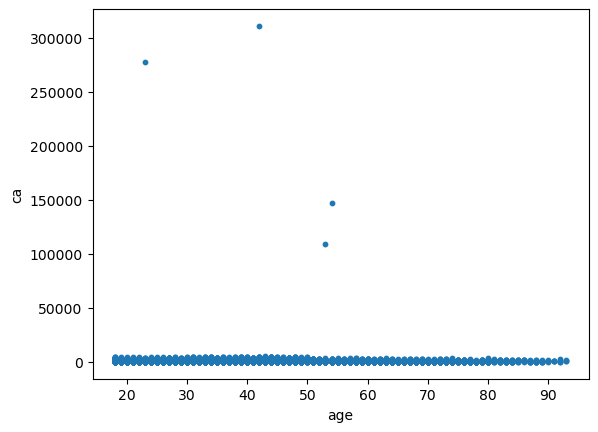

In [79]:
df_ca_customers[['age','ca']].plot.scatter(x = 'age', y = 'ca', s = 10)

<AxesSubplot:xlabel='age', ylabel='ca'>

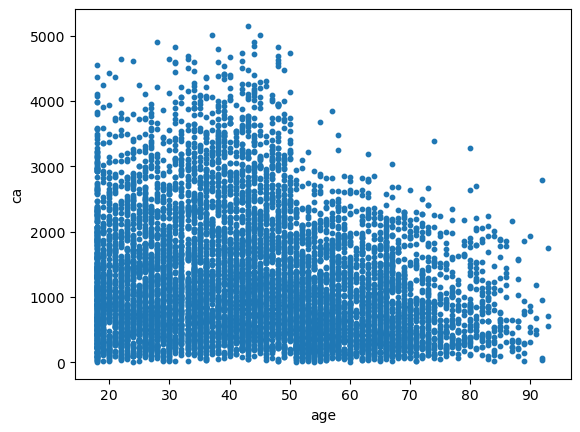

In [80]:
df_ca_customers[df_ca_customers['ca']<50000][['age','ca']].plot.scatter(x = 'age', y = 'ca', s = 10)

In [81]:
df_ca_customers_mean=df_ca_customers[df_ca_customers['ca']<50000][['age','ca']].groupby('age').mean()
df_ca_customers_mean.reset_index(inplace=True)
df_ca_customers_mean.head()

age           ca
0   18  1336.814050
1   19  1173.214000
2   20  1222.198828
3   21  1355.869040
4   22  1166.381912

<AxesSubplot:xlabel='age', ylabel='ca'>

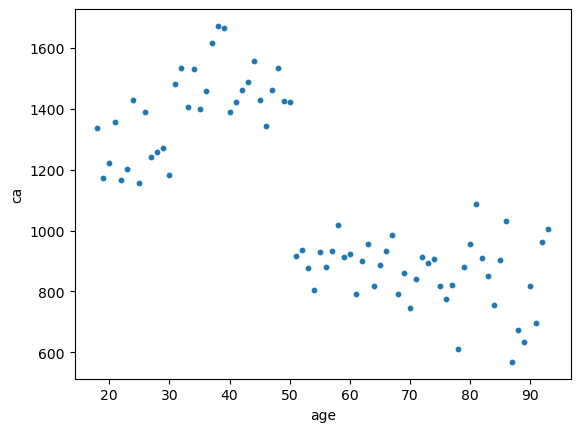

In [82]:
df_ca_customers_mean.plot.scatter(x = 'age', y = 'ca', s = 10)

In [83]:
### visuellement on peut constater qu'il n'ya pas de relation lineaire, mais on remarque une correlation entre le chiffre d'affaire et l'age( a verifier avec anova)

### pour cela on va s'interesser a une seule categorie, celle des clients inferieur a 50ans 

In [84]:
## estimation de l'equation

In [85]:
import statsmodels.api as sm
df_ca_customers_mean['intercept']=1
lm=sm.OLS(df_ca_customers_mean[df_ca_customers_mean.age<50]['ca'],df_ca_customers_mean[df_ca_customers_mean.age<50][['age','intercept']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ca   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     18.83
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           0.000149
Time:                        18:09:59   Log-Likelihood:                -196.33
No. Observations:                  32   AIC:                             396.7
Df Residuals:                      30   BIC:                             399.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            9.5885      2.210      4.339      0.000       5.076      14.101
intercept   1074.7465     76.787     13.996      0.000     917.926    1231.567
==============================================================================
Omnibus:                        2.051   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.629
Skew:                           0.388   Prob(JB):                        0.443
Kurtosis:                       2.214   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### r_squarred de pearson est egale a 38,6% , ce qui veut dire que 38,6%de la variance du montant total des achat est explique par la variance de l'age 

### Test central anova
h0: il n y a pas d effet regression linaire

h1: il y a un effet regression linaire

la pvalue (f_stat) est inf a 0,05 [ Prob (F-statistic):	0.000148]

donc on a un effet linaire

montant=9.9987*age+1123.3103+residus

cette equation est valide seulement si nos residus suivent une loi normale

#### mais verifions si les residus suivent une loi normale

### Test de normalite shapiro
le test de shapiro

H0: l'echantillon suit une loi normale

H1: l'echantillon ne suit pas une loi normale

si la pvalue est inf a 0.05 on rejete h0 autrment dit l'echantillon ne suit pas une loi normale

si la pvalue est sup a 0.05 on maintient h0 autrment dit l'echantillon suit une loi normale

In [86]:
stats.shapiro(results.resid)

ShapiroResult(statistic=0.9595932960510254, pvalue=0.2677159607410431)

#### la pvalue est sup a 0.05 on maintient h0 autrement dit l'echantillon suit une loi normale

In [87]:
## exemple de prediction pour une personne de 35ans

In [88]:
age=35
x=results.get_prediction([age,1])
x.summary_frame(0.05)

mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1410.34335  20.670481    1368.128596    1452.558104    1170.88058   

   obs_ci_upper  
0   1649.806121

#### une personne de 35ans depense en moyenne 1473 euros avec un intervalle de confiance de 95% entre 1223 et 1722euros

##  Lien entre l’âge des clients et la fréquence d’achat

In [89]:
df_ca_customers.head()

sex  age         ca  count       mean
client_id                                      
c_1609      m   42  310897.29  24449  12.716156
c_4958      m   23  277167.93   4968  55.790646
c_6714      f   54  147086.21   8789  16.735261
c_3454      m   53  108776.83   6478  16.791730
c_1570      f   43    5146.94    358  14.376927

<AxesSubplot:xlabel='age', ylabel='count'>

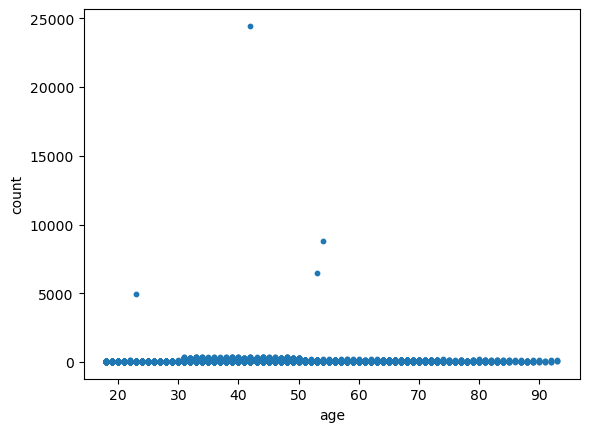

In [90]:
df_ca_customers[['age','count']].plot.scatter(x = 'age', y = 'count', s = 10)

<AxesSubplot:xlabel='age', ylabel='count'>

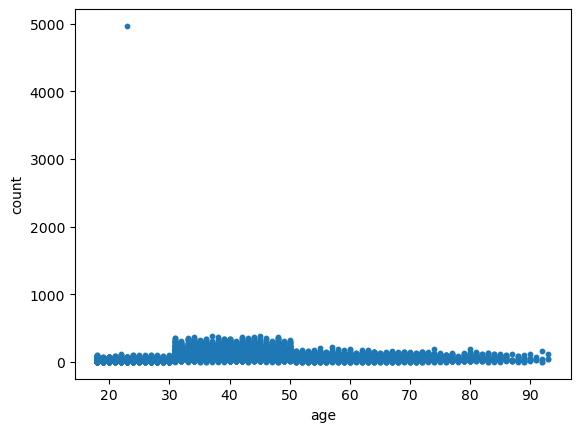

In [91]:
df_ca_customers[df_ca_customers['count']<5000][['age','count']].plot.scatter(x = 'age', y = 'count', s = 10)

In [92]:
df_ca_customers_mean=df_ca_customers[df_ca_customers['count']<5000][['age','count']].groupby('age').mean()
df_ca_customers_mean.reset_index(inplace=True)
df_ca_customers_mean.head()

age      count
0   18  33.201373
1   19  28.986207
2   20  30.441379
3   21  32.464000
4   22  31.220588

<AxesSubplot:xlabel='age', ylabel='count'>

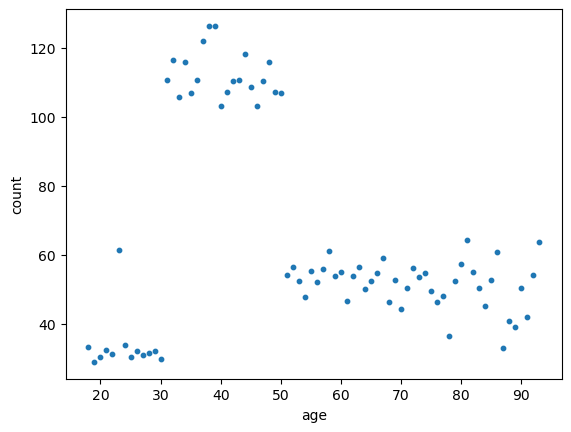

In [93]:
df_ca_customers_mean.plot.scatter(x = 'age', y = 'count', s = 10)

In [94]:
## une anova aurait ete meilleur mais on va applique une regression que sur une partie de l'echantillon 

In [95]:
#computstat
import statsmodels.api as sm
df_ca_customers_mean['intercept']=1
lm=sm.OLS(df_ca_customers_mean[df_ca_customers_mean.age>50]['count'],
          df_ca_customers_mean[df_ca_customers_mean.age>50][['age','intercept']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.874
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0976
Time:                        18:10:00   Log-Likelihood:                -140.90
No. Observations:                  43   AIC:                             285.8
Df Residuals:                      41   BIC:                             289.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.1368      0.081     -1.695      0.098      -0.300       0.026
intercept     61.4007      5.894     10.418      0.000      49.498      73.303
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                0.613
Skew:                          -0.143   Prob(JB):                        0.736
Kurtosis:                       3.510   Cond. No.                         430.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ici pas de regression linaire car pvalue > 0,05

## Lien entre l'âge des clients et le panier moyen

In [96]:
df_ca_customers.head()

sex  age         ca  count       mean
client_id                                      
c_1609      m   42  310897.29  24449  12.716156
c_4958      m   23  277167.93   4968  55.790646
c_6714      f   54  147086.21   8789  16.735261
c_3454      m   53  108776.83   6478  16.791730
c_1570      f   43    5146.94    358  14.376927

<AxesSubplot:xlabel='age', ylabel='mean'>

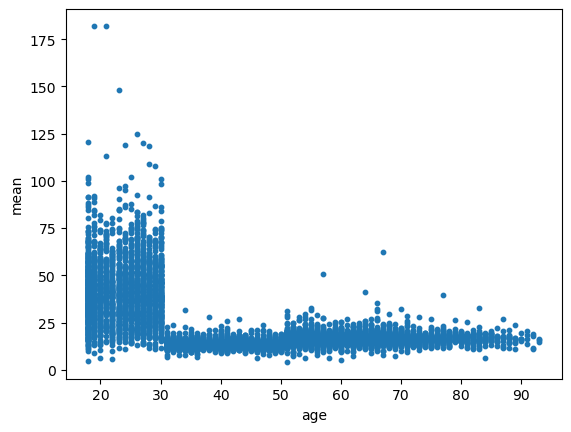

In [97]:
df_ca_customers[['age','mean']].plot.scatter(x = 'age', y = 'mean', s = 10)

### visuellement on peut constater qu'il n'y a pas de relation lineaire,mais on remarque une correlation entre le panier moyen et l'age

In [98]:
df_ca_customers_mean=df_ca_customers[df_ca_customers['mean']<125][['age','mean']].groupby('age').mean()
df_ca_customers_mean.reset_index(inplace=True)
df_ca_customers_mean.head()

age       mean
0   18  41.071849
1   19  43.137490
2   20  40.727883
3   21  43.564102
4   22  38.894382

<AxesSubplot:xlabel='age', ylabel='mean'>

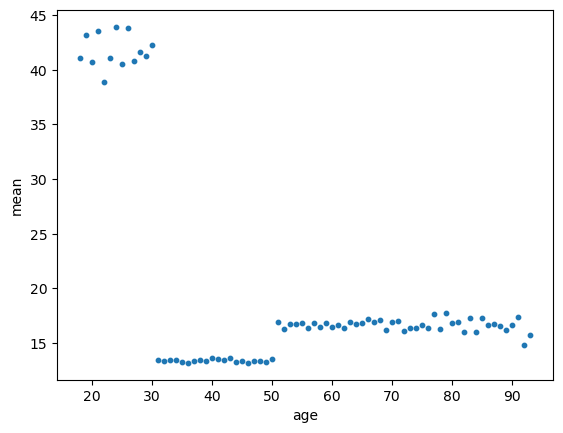

In [99]:
df_ca_customers_mean.plot.scatter(x = 'age', y = 'mean', s = 10)

In [100]:
#computstat
import statsmodels.api as sm
df_ca_customers_mean['intercept']=1
lm=sm.OLS(df_ca_customers_mean[(df_ca_customers_mean.age<50)&(df_ca_customers_mean.age>30)]['mean'],
          df_ca_customers_mean[(df_ca_customers_mean.age<50)&(df_ca_customers_mean.age>30)][['age','intercept']])
results=lm.fit()
results.summary()

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.6509
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.431
Time:                        18:10:00   Log-Likelihood:                 13.370
No. Observations:                  19   AIC:                            -22.74
Df Residuals:                      17   BIC:                            -20.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0043      0.005     -0.807      0.431      -0.015       0.007
intercept     13.5363      0.214     63.246      0.000      13.085      13.988
==============================================================================
Omnibus:                        4.078   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.197
Skew:                           0.792   Prob(JB):                        0.333
Kurtosis:                       3.516   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test central anova
h0: il n y a pas d'effet regression linaire

h1: il y a un effet regression linaire

la pvalue (f_stat) est inf a 0,05 [Prob (F-statistic):0.431]

donc on il n'y a pas d'effet regression linaire

### Nous avons ici a une correlation non linaire, une anova sera plus adequate pour ce cas

In [101]:
import statsmodels.api as sm
df_ca_customers_mean['intercept']=1
lm=sm.OLS(df_ca_customers_mean[df_ca_customers_mean.age<30]['mean'],
          df_ca_customers_mean[df_ca_customers_mean.age<30][['age','intercept']])
results=lm.fit()
results.summary()

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.099
Method:                 Least Squares   F-statistic:                  0.005329
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.943
Time:                        18:10:00   Log-Likelihood:                -21.885
No. Observations:                  12   AIC:                             47.77
Df Residuals:                      10   BIC:                             48.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0100      0.137     -0.073      0.943      -0.316       0.296
intercept     41.9323      3.262     12.856      0.000      34.665      49.200
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   3.150
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.412
Skew:                           0.094   Prob(JB):                        0.814
Kurtosis:                       2.112   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comme precedemment il y a une correlation non linaire, une anova est plus adequate pour ce cas